# Aim Of The Project

This analysis is all about diving deep into the financial dynamics of our food delivery operation 🚚💰. Our mission? To uncover where we can slash costs, boost revenue, and amp up profitability 📈. We're on a quest to find out just how lucrative each order can be 💸. So, let's dig in and uncover the secrets to supercharging our food delivery service!

# Process we can follow

Let's kick things off by rounding up a treasure trove of data covering every nook and cranny of our food delivery operations 📊🕵️.

Time to give our data a spa day! We'll scrub away any inconsistencies, fill in the blanks, and toss out anything that's not pulling its weight 💦🧼.

Now, we're playing detective! We'll pluck out those juicy features that hold the keys to our costs and profits 🔍💰.

It's time to dissect the costs of every order, slicing through fixed costs like packaging and slicing through variable costs like delivery fees and discounts 🍕💸.

Next up, let's count the coins! We'll tally up the revenue from each order, focusing on commission fees and the shiny value before discounts 💰✨.

The moment of truth! With our calculators at the ready, we'll crunch the numbers to unveil the profit of each order. Let's see where the gold mines lie and where we might need to dig a little deeper 💼🔍.

Armed with our insights, it's time to craft our battle plan! We'll cook up strategic recommendations aimed at making our pockets jingle louder 📈💡.

And now, we're putting our plan to the test! Using our data magic, we'll conjure up simulations to see how our proposed changes shake up the financial landscape. Time to see if we're brewing up a pot of gold ☕💰.

In [1]:
import pandas as pd  # Importing the pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing matplotlib for plotting graphs and charts
import seaborn as sns  # Importing seaborn for enhanced visualization aesthetics
import warnings  # Importing warnings to handle any potential warnings
warnings.filterwarnings("ignore")  # Suppressing any warning messages to keep the output clean

In [2]:
orders = pd.read_csv("food_orders_new_delhi.csv")  
# Reading the CSV file "food_orders_new_delhi.csv" into a pandas DataFrame named 'orders'. This assumes the file is in the current working directory.

In [3]:
orders.head()  
# Displaying the first few rows of the 'orders' DataFrame to get a glimpse of the data structure and contents.

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [4]:
orders.shape  
# Returning the shape of the 'orders' DataFrame, which provides the number of rows and columns present in the dataset.

(1000, 12)

In [6]:
orders.info()  
# Providing concise summary information about the 'orders' DataFrame, including the data types of each column and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


# Data cleaning

The dataset is sparkling clean with no missing values! Here's our game plan for polishing it up even more: ✨

Cleaning steps:

Let's transform "Order Date and Time" and "Delivery Date and Time" into a datetime format, giving us a clearer picture of when the orders were placed and delivered 📅⏰.

Time to tame the "Discounts and Offers" column! We'll wrangle those values into a consistent numeric format or calculate the exact discount amounts 💸💡.

We'll make sure all our monetary values are dressed to impress, ensuring they're in a suitable format for easy analysis and comparison 💼💰.

In [7]:
from datetime import datetime  
# Importing the datetime module from the datetime library to facilitate handling of date and time data.

In [8]:
orders.columns  
# Returning the column names of the 'orders' DataFrame, providing a list of all the features present in the dataset.

Index(['Order ID', 'Customer ID', 'Restaurant ID', 'Order Date and Time',
       'Delivery Date and Time', 'Order Value', 'Delivery Fee',
       'Payment Method', 'Discounts and Offers', 'Commission Fee',
       'Payment Processing Fee', 'Refunds/Chargebacks'],
      dtype='object')

In [9]:
orders['Order Date and Time'] = pd.to_datetime(orders['Order Date and Time'])  
# Converting the "Order Date and Time" column in the 'orders' DataFrame to datetime format, allowing for easier manipulation and analysis of temporal data.

orders['Delivery Date and Time'] = pd.to_datetime(orders['Delivery Date and Time'])  
# Converting the "Delivery Date and Time" column in the 'orders' DataFrame to datetime format, facilitating analysis of delivery timings.

In [10]:
orders.info()  
# Displaying concise summary information about the 'orders' DataFrame after the data type conversion, including the updated data types of each column and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    815 non-null    object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

In [13]:
def extract_dis(discount_str):
    # Check if the input is a string
    if isinstance(discount_str, str):
        # Check if the substring 'off' is present in the discount_str
        if 'off' in discount_str:
            # Split the discount_str by spaces and extract the first element
            return float(discount_str.split(' ')[0])
        # Check if there is '%' present in the discount_str
        elif '%' in discount_str:
            # Split the discount_str by '%' and extract the first element
            return float(discount_str.split('%')[0])
        else:
            return 0.0
    else:
        return 0.0  # Return 0.0 for non-string values

In [14]:
orders['Discount Percentage'] = orders['Discounts and Offers'].apply(lambda x: extract_dis(x))  
# Applying the extract_dis function to each element in the 'Discounts and Offers' column of the 'orders' DataFrame using the apply() function. This extracts the discount percentage from each string in the column and assigns it to a new column 'Discount Percentage'.

In [15]:
def extract_dis(discount_str):  
# Function definition for extract_dis. Takes one argument, discount_str.

    if isinstance(discount_str, str):  
    # Check if the discount_str argument is a string.

        if 'off' in discount_str:  
        # Check if the substring 'off' is present in the discount_str. If it is, execute the code under this if statement.

            return float(discount_str.split(' ')[0])  
            # Split the discount_str by spaces and extract the first element, converting it to a float.

        elif '%' in discount_str:  
        # Check if there is '%' present in the discount_str.

            return float(discount_str.split('%')[0])  
            # Split the discount_str by '%' and extract the first element, converting it to a float.

        else:  
        # This else block will execute if neither 'off' nor '%' were found in discount_str.

            return 0.0  

    elif isinstance(discount_str, float):  
    # Check if the discount_str is a float.

        return discount_str  
        # Return the discount_str as it is.

    else:  
    # If discount_str is neither a string nor a float, raise a TypeError.

        raise TypeError("Invalid discount_str type")

In [16]:
orders['Discount Percentage'] = orders['Discounts and Offers'].apply(lambda x: extract_dis(x))  
# Applying the extract_dis function to each element in the 'Discounts and Offers' column of the 'orders' DataFrame using the apply() function. This extracts the discount percentage from each string in the column and assigns it to a new column 'Discount Percentage'.

In [17]:
orders['Discount Amount'] = orders.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100) if x['Discount Percentage'] > 1 else x['Discount Percentage'], axis=1)  
# Calculating the discount amount for each order and assigning it to a new column 'Discount Amount' in the 'orders' DataFrame. The lambda function applies the discount percentage to the order value to compute the discount amount. If the discount percentage is greater than 1 (indicating an absolute discount amount), it is applied as it is without division by 100.

In [18]:
orders['Discount Amount'] = orders.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] > 1 else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)  
# Updating the 'Discount Amount' column in the 'orders' DataFrame. If the 'Discount Percentage' is greater than 1 (indicating an absolute discount amount), the existing 'Discount Amount' is retained. Otherwise, the discount amount is computed by applying the discount percentage to the order value.

In [19]:
orders[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']]  
# Selecting specific columns ('Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount') from the 'orders' DataFrame for display.

,Order Value,Discounts and Offers,Discount Percentage,Discount Amount
0,1914,5% on App,5.0,95.70
1,986,10%,10.0,98.60
2,937,15% New User,15.0,140.55
3,1463,NaN,NaN,NaN
4,1992,50 off Promo,50.0,996.00
...,...,...,...,...
995,825,5% on App,5.0,41.25
996,1627,NaN,NaN,NaN
997,553,NaN,NaN,NaN
998,1414,15% New User,15.0,212.10


In [21]:
orders.describe().T  
# Generating descriptive statistics of the 'orders' DataFrame and transposing the result to have features as rows and statistics as columns.

,count,mean,min,25%,50%,75%,max,std
Order ID,1000.0,500.5,1.0,250.75,500.5,750.25,1000.0,288.819436
Order Date and Time,1000,2024-01-20 11:03:07.648000,2024-01-01 02:12:47,2024-01-11 18:45:27.249999872,2024-01-20 11:38:43,2024-01-30 03:47:34.249999872,2024-02-07 23:56:12,NaN
Delivery Date and Time,1000,2024-01-20 12:16:42.148000256,2024-01-01 03:59:47,2024-01-11 19:54:57.249999872,2024-01-20 13:02:23,2024-01-30 05:09:34.249999872,2024-02-08 01:45:12,NaN
Order Value,1000.0,1053.969,104.0,597.75,1038.5,1494.0,1995.0,530.975339
Delivery Fee,1000.0,28.62,0.0,20.0,30.0,40.0,50.0,16.958278
Commission Fee,1000.0,126.99,50.0,90.0,127.0,164.0,200.0,43.06405
Payment Processing Fee,1000.0,29.832,10.0,20.0,30.0,40.0,50.0,11.627165
Refunds/Chargebacks,1000.0,28.3,0.0,0.0,0.0,50.0,150.0,49.614228
Discount Percentage,815.0,19.957055,5.0,10.0,10.0,15.0,50.0,17.536326
Discount Amount,815.0,213.813313,5.6,59.725,119.1,238.125,996.0,237.791452


# Observation:

🕒 The Order Date and Time as well as the Delivery Date and Time columns have been upgraded to datetime format for better time management.

💸 Introducing a fresh Discount Amount column! It's been brewed from the Discounts and Offers, extracting either percentage discounts or fixed amounts, and then generously applying them to the Order Value.

🎁 Presenting the Discount Percentage! Now you can easily discern the discount rate or fixed amount discount straight from this newly added column.

# Cost and Profit analysis

Taking into account the Delivery Fee, Payment Processing Fee, and Discount Amount, all integral to each order, let's compute the total cost per order. Once done, we'll aggregate this data to gain a comprehensive understanding of the overall expenses. 📊💰

Since the platform's revenue hinges primarily on Commission Fees, we'll work out the net profit by subtracting the total costs from the revenue generated by commission fees. 💸✨

In [22]:
orders.columns  
# Retrieving the column names of the 'orders' DataFrame, providing a list of all the features present in the dataset.

Index(['Order ID', 'Customer ID', 'Restaurant ID', 'Order Date and Time',
       'Delivery Date and Time', 'Order Value', 'Delivery Fee',
       'Payment Method', 'Discounts and Offers', 'Commission Fee',
       'Payment Processing Fee', 'Refunds/Chargebacks', 'Discount Percentage',
       'Discount Amount'],
      dtype='object')

In [23]:
orders['Total Costs'] = orders['Delivery Fee'] + orders['Payment Processing Fee'] + orders['Discount Amount']  
# Calculating the total costs per order by summing up the Delivery Fee, Payment Processing Fee, and Discount Amount for each row in the 'orders' DataFrame.

orders['Revenue'] = orders['Commission Fee']  
# Assigning the 'Commission Fee' column to a new column 'Revenue' in the 'orders' DataFrame to represent the revenue generated from each order.

orders['Profit'] = orders['Revenue'] - orders['Total Costs']  
# Computing the profit per order by subtracting the total costs from the revenue for each order in the 'orders' DataFrame.

In [24]:
orders.head()  
# Displaying the first few rows of the 'orders' DataFrame to get a quick look at the data and the newly added columns.

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15.0,140.55,215.55,195,-20.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,NaN,NaN,NaN,146,NaN
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0,996.00,1076.00,130,-946.00


In [25]:
orders.shape  
# Returning the shape of the 'orders' DataFrame, indicating the number of rows and columns in the dataset.

(1000, 17)

In [26]:
orders.isnull().sum()  
# Counting the number of missing values in each column of the 'orders' DataFrame using the isnull() method, followed by the sum() method to sum up the missing values for each column.

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
Discount Percentage       185
Discount Amount           185
Total Costs               185
Revenue                     0
Profit                    185
dtype: int64

In [27]:
orders.dropna(inplace=True)  
# Dropping rows with missing values from the 'orders' DataFrame. The inplace=True parameter ensures that the changes are made directly to the DataFrame without the need to assign the result to a new DataFrame.

In [28]:
orders.shape  
# Returning the shape of the 'orders' DataFrame after dropping rows with missing values. This provides the updated number of rows and columns in the dataset.

(815, 17)

In [29]:
total_orders = orders.shape[0]  
# Calculating the total number of orders by retrieving the number of rows in the 'orders' DataFrame using the shape attribute.

total_revenue = orders.Revenue.sum()  
# Computing the total revenue by summing up the values in the 'Revenue' column of the 'orders' DataFrame.

total_costs = orders['Total Costs'].sum()  
# Calculating the total costs by summing up the values in the 'Total Costs' column of the 'orders' DataFrame.

total_profit = orders.Profit.sum()  
# Determining the total profit by summing up the values in the 'Profit' column of the 'orders' DataFrame.

In [30]:
print('Total Orders: ', total_orders)  
# Printing the total number of orders calculated earlier.

print('Total Revenue: ', total_revenue)  
# Printing the total revenue calculated earlier.

print('Total Costs: ', total_costs)  
# Printing the total costs calculated earlier.

print('Total Profit: ', total_profit)  
# Printing the total profit calculated earlier.

Total Orders:  815
Total Revenue:  103798
Total Costs:  221741.84999999998
Total Profit:  -117943.84999999998


Observations:

The analysis reveals that the total costs surpass the revenue generated from commission fees, resulting in a net loss.

This indicates that the existing commission rates, delivery charges, and discount strategies may not be conducive to profitability.

To gain deeper insights into the distribution of costs, revenue, and profit, let's visualize them through plots! 📊✨

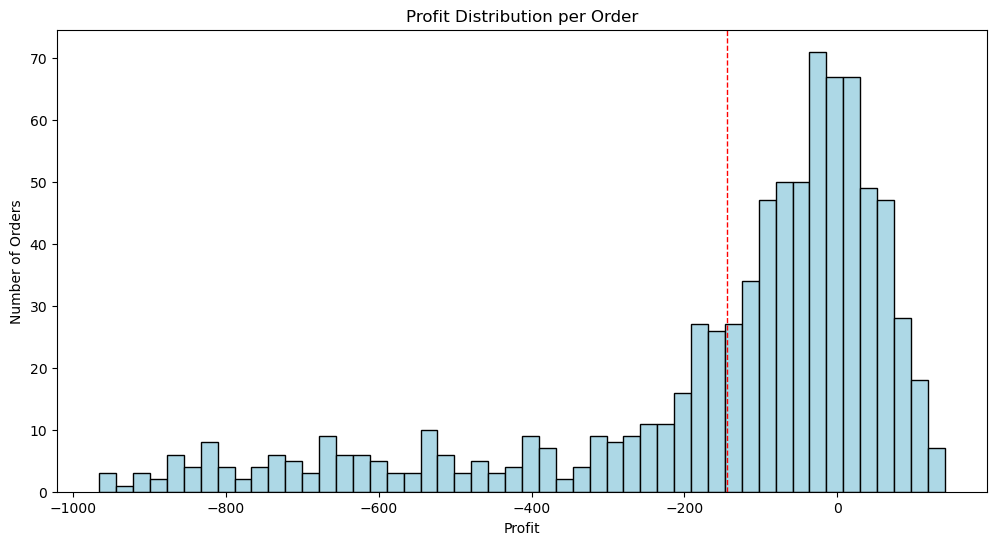

In [32]:
plt.figure(figsize=(12, 6))  
# Creating a new figure with a specific size for the histogram plot.

plt.hist(orders['Profit'], bins=50, color='lightblue', edgecolor='black')  
# Plotting a histogram of the 'Profit' column from the 'orders' DataFrame with 50 bins. The bars are colored lightblue with black edges.

plt.title('Profit Distribution per Order')  
# Adding a title to the plot.

plt.xlabel('Profit')  
# Adding a label to the x-axis.

plt.ylabel('Number of Orders')  
# Adding a label to the y-axis.

plt.axvline(orders.Profit.mean(), color='red', linestyle='dashed', linewidth=1)  
# Adding a vertical dashed line at the mean value of profit, colored red.

plt.show()  
# Displaying the histogram plot.

Observations:

📉 A significant portion of orders are resulting in a loss, as indicated by the histogram.

🚨 The red dashed line denotes the average profit, which resides in the negative territory.

🕵️‍♂️ The business would benefit from delving deeper into the reasons behind the frequent lower profits or losses and crafting strategies to bolster profitability.

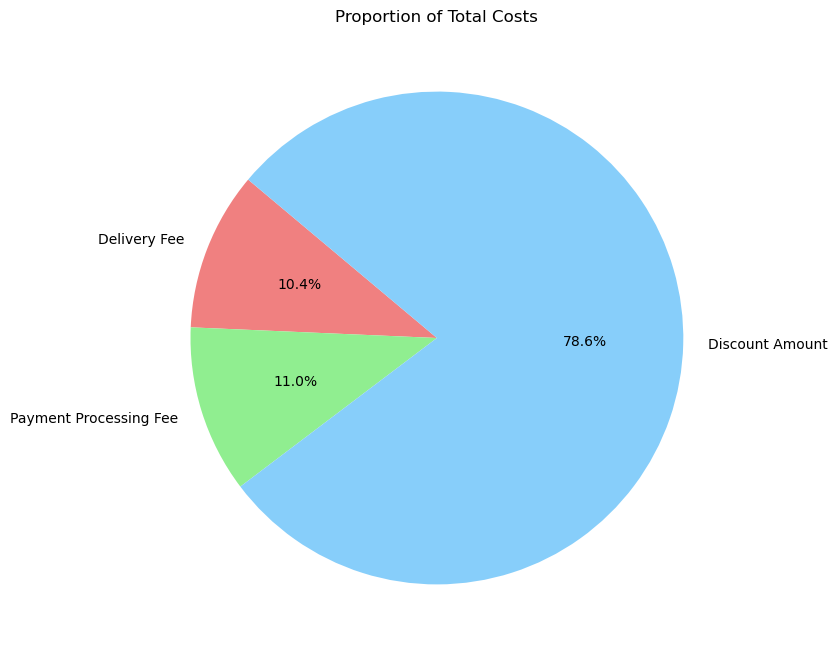

In [33]:
costs = orders[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()  
# Calculating the total costs for delivery fee, payment processing fee, and discount amount by summing up the values in each column. 

plt.figure(figsize=(8, 8))  
# Creating a new figure for the pie chart with a specific size.

plt.pie(costs, labels=costs.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgreen', 'lightskyblue'])  
# Creating a pie chart to visualize the proportion of total costs. Labels are set as the index of the costs DataFrame, and autopct is used to display the percentage. Startangle sets the starting angle of the pie chart, and colors are specified for each segment.

plt.title('Proportion of Total Costs')  
# Adding a title to the pie chart.

plt.show()  
# Displaying the pie chart.

Observation:

🎁 Discounts constitute a substantial portion of the costs, indicating that promotional discount strategies might be significantly impacting overall profitability.

# Let’s compare total revenue, total costs, and total profit:

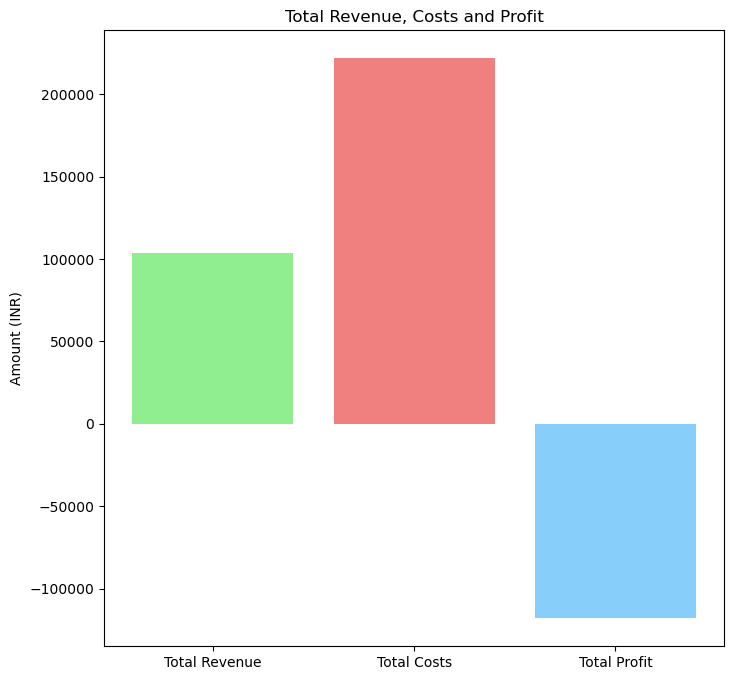

In [34]:
total = ['Total Revenue', 'Total Costs', 'Total Profit']  
# Creating a list of labels for the bar plot representing total revenue, total costs, and total profit.

values = [total_revenue, total_costs, total_profit]  
# Creating a list of corresponding values for each label in the total list.

plt.figure(figsize=(8, 8))  
# Creating a new figure for the bar plot with a specific size.

plt.bar(total, values, color=['lightgreen', 'lightcoral', 'lightskyblue'])  
# Creating a bar plot to visualize the total revenue, costs, and profit. Colors are specified for each bar.

plt.title('Total Revenue, Costs and Profit')  
# Adding a title to the bar plot.

plt.ylabel('Amount (INR)')  
# Adding a label to the y-axis.

plt.show()  
# Displaying the bar plot.

Observation:

📊 The graph clearly illustrates that total costs exceed the revenue, leading to a loss.

# Let's create a New Strategy for Profit

We should explore:

🔍 Determining the new average commission fee based on profitable orders.

🔍 Calculating the average discount percentage for profitable orders.

Let's calculate:

The average commission percentage for profitable orders.

The average discount percentage for profitable orders.

In [35]:
profitable_orders = orders[orders.Profit > 0]  
# Filtering the 'orders' DataFrame to select only rows where the profit is greater than 0, indicating profitable orders.

In [36]:
profitable_orders.head()  
# Displaying the first few rows of the 'profitable_orders' DataFrame to examine the profitable orders data.

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150,10.0,43.90,90.90,92,1.10
6,7,C1466,R2457,2024-01-12 23:55:48,2024-01-13 00:48:48,303,30,Digital Wallet,5% on App,144,12,50,5.0,15.15,57.15,144,86.85
7,8,C5426,R2978,2024-01-26 22:46:24,2024-01-27 00:36:24,260,0,Credit Card,10%,55,19,0,10.0,26.00,45.00,55,10.00


In [37]:
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100  
# Calculating the commission percentage for profitable orders by dividing the 'Commission Fee' by the 'Order Value' and multiplying by 100.

In [38]:
profitable_orders.head()  
# Displaying the first few rows of the 'profitable_orders' DataFrame to inspect the calculated commission percentage for profitable orders.

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit,Commission Percentage
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30,7.836991
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40,20.081136
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150,10.0,43.90,90.90,92,1.10,20.956720
6,7,C1466,R2457,2024-01-12 23:55:48,2024-01-13 00:48:48,303,30,Digital Wallet,5% on App,144,12,50,5.0,15.15,57.15,144,86.85,47.524752
7,8,C5426,R2978,2024-01-26 22:46:24,2024-01-27 00:36:24,260,0,Credit Card,10%,55,19,0,10.0,26.00,45.00,55,10.00,21.153846


In [39]:
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100  
# Calculating the effective discount percentage for profitable orders by dividing the 'Discount Amount' by the 'Order Value' and multiplying by 100.

In [40]:
profitable_orders.head()  
# Displaying the first few rows of the 'profitable_orders' DataFrame to inspect the calculated commission percentage for profitable orders.

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit,Commission Percentage,Effective Discount Percentage
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30,7.836991,5.0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40,20.081136,10.0
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150,10.0,43.90,90.90,92,1.10,20.956720,10.0
6,7,C1466,R2457,2024-01-12 23:55:48,2024-01-13 00:48:48,303,30,Digital Wallet,5% on App,144,12,50,5.0,15.15,57.15,144,86.85,47.524752,5.0
7,8,C5426,R2978,2024-01-26 22:46:24,2024-01-27 00:36:24,260,0,Credit Card,10%,55,19,0,10.0,26.00,45.00,55,10.00,21.153846,10.0


In [41]:
new_avg_com_percent = profitable_orders['Commission Percentage'].mean()  
# Calculating the new average commission percentage for profitable orders by computing the mean of the 'Commission Percentage' column in the 'profitable_orders' DataFrame.

new_avg_disc_percent = profitable_orders['Effective Discount Percentage'].mean()  
# Calculating the new average effective discount percentage for profitable orders by computing the mean of the 'Effective Discount Percentage' column in the 'profitable_orders' DataFrame.

print(new_avg_com_percent, new_avg_disc_percent)  
# Printing the new average commission percentage and the new average effective discount percentage.

36.99030453177021 9.938775510204081


Observation:

🔍 New Average Commission Percentage: 36.99% or 37%

🔍 New Average Discount Percentage: 9.9% or 10%

Based on this analysis, higher commission rates and lower discount rates could potentially enhance profitability.

# Let's visualize a comparison of actual versus recommended discounts and commission Percentage

In [42]:
recommended_com_percent = 37  
recommended_disc_percent = 10  

# Calculating the simulated commission fee and discount amount using the recommended percentages

orders['Simulated Commission Fee'] = orders['Order Value'] * (recommended_com_percent / 100)  
# Simulating the commission fee for each order by multiplying the 'Order Value' by the recommended commission percentage (in decimal).

orders['Simulated Discount Amount'] = orders['Order Value'] * (recommended_disc_percent / 100)  
# Simulating the discount amount for each order by multiplying the 'Order Value' by the recommended discount percentage (in decimal).

In [43]:
orders.head()  
# Displaying the first few rows of the 'orders' DataFrame to examine the newly added simulated commission fee and discount amount columns.

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit,Simulated Commission Fee,Simulated Discount Amount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30,708.18,191.4
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40,364.82,98.6
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15.0,140.55,215.55,195,-20.55,346.69,93.7
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0,996.00,1076.00,130,-946.00,737.04,199.2
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150,10.0,43.90,90.90,92,1.10,162.43,43.9


In [44]:
orders['Simulated Total Costs'] = (orders['Delivery Fee'] + orders['Payment Processing Fee'] + orders['Simulated Discount Amount'])  
# Calculating the simulated total costs for each order by summing up the delivery fee, payment processing fee, and simulated discount amount.

orders['Simulated Profit'] = (orders['Simulated Commission Fee'] - orders['Simulated Total Costs'])  
# Computing the simulated profit for each order by subtracting the simulated total costs from the simulated commission fee.

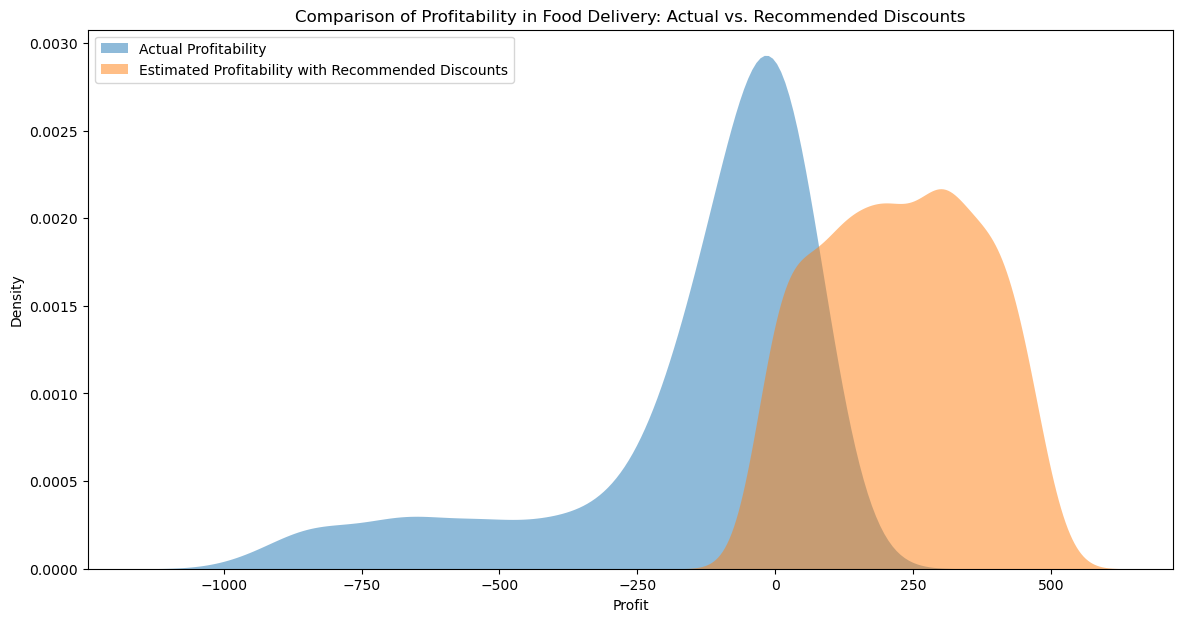

In [45]:
plt.figure(figsize=(14, 7))  
# Creating a new figure for the kernel density plot with a specific size.

# Plotting the kernel density estimation (KDE) for actual profitability
sns.kdeplot(orders['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=0)  
# Using seaborn's kdeplot to visualize the kernel density estimation of the 'Profit' column from the 'orders' DataFrame. The label is set as 'Actual Profitability', and the plot is filled with color and set to be semi-transparent.

# Plotting the kernel density estimation (KDE) for simulated profitability
sns.kdeplot(orders['Simulated Profit'], label='Estimated Profitability with Recommended Discounts', fill=True, alpha=0.5, linewidth=0)  
# Using seaborn's kdeplot to visualize the kernel density estimation of the 'Simulated Profit' column from the 'orders' DataFrame. The label is set as 'Estimated Profitability with Recommended Discounts', and the plot is filled with color and set to be semi-transparent.

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts')  
# Adding a title to the plot.

plt.xlabel('Profit')  
# Adding a label to the x-axis.

plt.ylabel('Density')  
# Adding a label to the y-axis.

plt.legend(loc='upper left')  
# Adding a legend to the plot and setting its location to the upper left corner.

plt.show()  
# Displaying the plot.

Conclusion:

📉 The actual profitability distribution indicates that a significant portion of orders result in a loss.

💡 The recommended or simulated distribution suggests a shift towards higher profitability per order.

📈 The recommended distribution is more skewed towards the positive side, indicating a higher proportion of profitable orders.